In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ambarish/breakhis")

print("Path to dataset files:", path)

Resuming download from 862978048 bytes (3415977660 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/ambarish/breakhis?dataset_version_number=4 (862978048/4278955708) bytes left.


100%|██████████| 3.99G/3.99G [00:41<00:00, 83.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ambarish/breakhis/versions/4


In [ ]:
import os
import shutil

# Define the common directory
common_dir = '/content/datasets/breakhis'

# Check if the dataset exists in common_dir
if not os.path.exists(common_dir):
    os.makedirs(common_dir)
    # Move dataset to common directory
    shutil.move('/root/.cache/kagglehub/datasets/ambarish/breakhis/versions/4', common_dir)

print(f"Dataset moved to: {common_dir}")


Dataset moved to: /content/datasets/breakhis


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kasikrit/idc-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.55G/1.55G [00:19<00:00, 84.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1


In [ ]:
import os
import shutil

# Define the common directory
common_dir = '/content/datasets/idc-dataset'

# Check if the dataset exists in common_dir
if not os.path.exists(common_dir):
    os.makedirs(common_dir)
    # Move dataset to common directory
    shutil.move('/root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1', common_dir)

print(f"Dataset moved to: {common_dir}")


Dataset moved to: /content/datasets/idc-dataset


Code for File: train_MobileNetV2.py

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout

from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, CSVLogger
import time
import os.path
import itertools
import cv2
from glob import glob
import matplotlib.pyplot as plt
import keras.backend as K
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
import math

import keras
from tensorflow.keras.regularizers import l2

In [ ]:
# Define dataset paths
train_data_dir = '/content/datasets/idc-dataset/1/IDC/training'
valid_data_dir = '/content/datasets/idc-dataset/1/IDC/validation'

# Check if the directories exist
if os.path.exists(train_data_dir):
    print(f"Training data directory exists: {train_data_dir}")
    print("Contents of the training directory:")
    print(os.listdir(train_data_dir))
else:
    print(f"Training data directory NOT found: {train_data_dir}")

if os.path.exists(valid_data_dir):
    print(f"Validation data directory exists: {valid_data_dir}")
    print("Contents of the validation directory:")
    print(os.listdir(valid_data_dir))
else:
    print(f"Validation data directory NOT found: {valid_data_dir}")


Training data directory exists: /content/datasets/idc-dataset/1/IDC/training
Contents of the training directory:
['0', '1']
Validation data directory exists: /content/datasets/idc-dataset/1/IDC/validation
Contents of the validation directory:
['0', '1']


<ipython-input-14-230954832a33>:55: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights=weights, include_top=False)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, None, None, 32) │            864 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, None, None, 32) │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, None, None, 32) │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, None, None, 32) │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, None, None, 32) │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, None, None, 32) │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, None, None, 16) │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, None, None, 16) │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, None, None, 96) │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, None, None, 96) │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, None, None, 96) │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, None, None, 96) │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, None, None, 96) │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,226,434 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

None
Number of layers in the base model:  157
Found 199818 images belonging to 2 classes.
Found 22201 images belonging to 2 classes.
Loading network from ImageNet weights.
Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6810 - loss: 0.9637
Epoch 1: val_loss improved from inf to 1.23945, saving model to Dataset/checkpoints/idcMobileNetV2.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 191s 141ms/step - accuracy: 0.6811 - loss: 0.9636 - val_accuracy: 0.7156 - val_loss: 1.2395 - learning_rate: 0.0010
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7193 - loss: 0.6733
Epoch 2: val_loss did not improve from 1.23945
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 107s 86ms/step - accuracy: 0.7193 - loss: 0.6732 - val_accuracy: 0.0000e+00 - val_loss: 2.6066 - learning_rate: 0.0010
Epoch 3/5
   2/1250 ━━━━━━━━━━━━━━━━━━━━ 1:24 67ms/step - accuracy: 0.5938 - loss: 2.5286

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7300 - loss: 0.6457
Epoch 3: val_loss did not improve from 1.23945
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 172s 138ms/step - accuracy: 0.7300 - loss: 0.6457 - val_accuracy: 0.7213 - val_loss: 1.3359 - learning_rate: 0.0010
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7361 - loss: 0.6197
Epoch 4: val_loss did not improve from 1.23945
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 108ms/step - accuracy: 0.7361 - loss: 0.6197 - val_accuracy: 0.0000e+00 - val_loss: 1.5453 - learning_rate: 0.0010
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7410 - loss: 0.5618
Epoch 5: val_loss improved from 1.23945 to 1.12766, saving model to Dataset/checkpoints/idcMobileNetV2.keras

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 180s 144ms/step - accuracy: 0.7410 - loss: 0.5618 - val_accuracy: 0.7118 - val_loss: 1.1277 - learning_rate: 0.0010


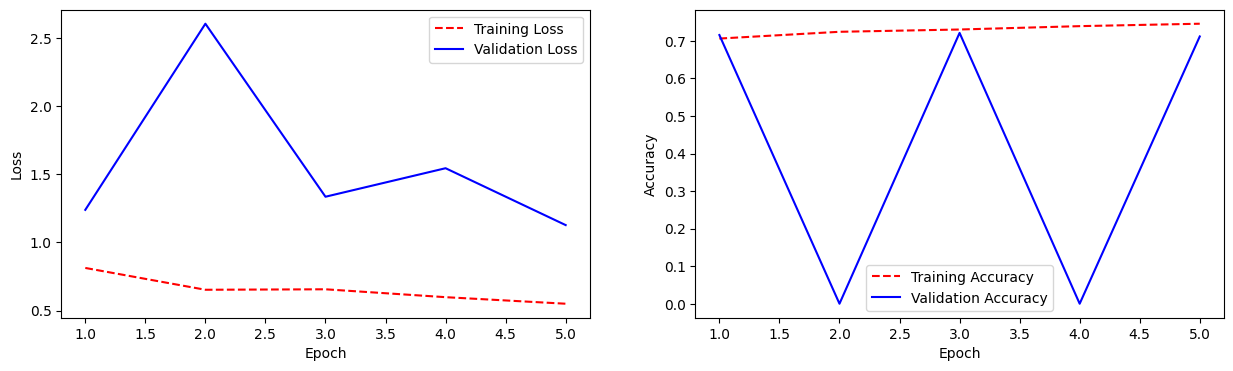

In [ ]:
batch_size=8
checkpointer = ModelCheckpoint(
    filepath=os.path.join('Dataset', 'checkpoints', 'idcMobileNetV2.keras'),
    verbose=1,
    save_best_only=True)


early_stopper = EarlyStopping(monitor='val_loss', patience=10)


tensorboard = TensorBoard(log_dir=os.path.join('Data', 'logs'))
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('Data', 'logs', 'idcMobileNetV2' + '-' + 'training-' + \
        str(timestamp) + '.log'))

def get_generators():
    train_datagen = ImageDataGenerator(
        featurewise_std_normalization=True,
        rescale=1./255,
                zoom_range=0.2,
                #brightness_range=(0.9, 1.1),
                rotation_range=0.2,
                #shear_range=0.2,
                width_shift_range=0.2,
                height_shift_range=0.2,
                horizontal_flip=True,
                vertical_flip=True,
                fill_mode='nearest'
                )
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(50, 50),
        batch_size=batch_size,
        classes=['0', '1'],
        #classes=['Benign', 'Malignant'],
        #classes=['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma'],
        class_mode='categorical')

    validation_generator = test_datagen.flow_from_directory(
        valid_data_dir,
        target_size=(50, 50),
        batch_size=batch_size,
        classes=['0', '1'],
        #classes=['Benign', 'Malignant'],
        #classes=['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma'],
        class_mode='categorical')


    return train_generator, validation_generator

def get_model(weights='imagenet'):

    base_model = MobileNetV2(weights=weights, include_top=False)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    x = Dropout(0.4)(x)

    predictions = Dense(2, activation='softmax')(x)


    model = Model(inputs=base_model.input, outputs=predictions)
    return model

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
def freeze_all_but_top(model):

    for layer in model.layers[:100]:
        layer.trainable = False


    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def train_model(model, nb_epoch, generators, callbacks=[]):
    train_generator, validation_generator = generators
    from sklearn.utils import class_weight
    import numpy as np

    epoch_steps = 10000

    his=model.fit(
        train_generator,
        steps_per_epoch=epoch_steps // batch_size,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.filenames) // batch_size,
        epochs=nb_epoch,
        #class_weight=class_weights,
        callbacks=callbacks)

    fig, axs = plt.subplots(1, 2, figsize = (15, 4))
    training_loss = his.history['loss']
    validation_loss = his.history['val_loss']
    training_accuracy = his.history['accuracy']
    validation_accuracy = his.history['val_accuracy']
    epoch_count = range(1, len(training_loss) + 1)
    #N=num_epochs
    axs[0].plot(epoch_count, training_loss, 'r--')
    axs[0].plot(epoch_count, validation_loss, 'b-')
    axs[0].legend(['Training Loss', 'Validation Loss'])
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Loss")
    axs[1].plot(epoch_count, training_accuracy, 'r--')
    axs[1].plot(epoch_count, validation_accuracy, 'b-')
    axs[1].legend(['Training Accuracy', 'Validation Accuracy'])
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Accuracy")

    return model

def main(weights_file):
    model = get_model()
    print(model.summary())

    print("Number of layers in the base model: ", len(model.layers))

    generators = get_generators()

    if weights_file is None:
        print("Loading network from ImageNet weights.")

        model = freeze_all_but_top(model)
        model = train_model(model, 5, generators,
                        [checkpointer, early_stopper, tensorboard, csv_logger,learning_rate_reduction])
    else:
        print("Loading saved model: %s." % weights_file)
        model.load_weights(weights_file)




if __name__ == '__main__':
    weights_file = None
    #print(len(data.classes))
    main(weights_file)